Task 2:The Sparks Foundation - GripNov22

Topic: Predict the optimum numbers of clusters and represent it visually

DATA SET USED: https://bit.ly/3kXTdox

DONE BY: MINHAL MANNAN,DATA SCIENCE AND BUSINESS ANALYTICS GRIP NOV'22

In [3]:
import pandas as pd #analyses data
import numpy as np #linear algebra
import matplotlib.pyplot as plt #plotting graphs
import seaborn as sns #data visualization
import sklearn #ml predictions
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [8]:
data=pd.read_csv("Iris.csv")
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
data.shape

(150, 6)

In [23]:
#data.nunique()
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [25]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

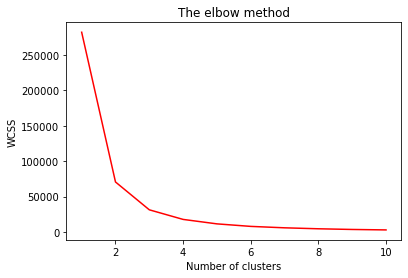

In [35]:
x = data.iloc[:, [0, 1, 2, 3,4]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss,color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

This elbow method which shows where the number doesn't decrese significantly with every iteration.
From this we will choose number of clusters is equals to 3.

In [38]:
#Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
kmeans_fit = kmeans.fit(x)
kmean_pred=kmeans.predict(x)
print(kmean_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


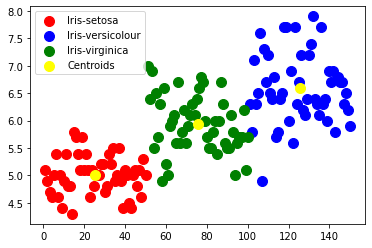

In [47]:
# Visualising the clusters - On the first two columns
plt.scatter(x[kmean_pred == 0, 0], x[kmean_pred == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[kmean_pred == 1, 0], x[kmean_pred == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[kmean_pred == 2, 0], x[kmean_pred == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')


plt.legend()


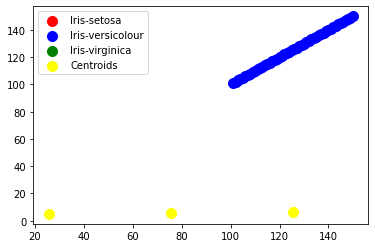

In [48]:
#visualization on different columns
plt.scatter(x[kmean_pred == 3, 0], x[kmean_pred == 3, 0], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[kmean_pred == 1, 0], x[kmean_pred == 1, 0],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[kmean_pred == 4, 0], x[kmean_pred == 4, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')


plt.legend()